# Introduction to Matplotlib

## Using the matplotlib.pyplot interface

There are many ways to use Matplotlib. In this course, we will focus on the pyplot interface, which provides the most flexibility in creating and customizing data visualizations.

Initially, we will use the pyplot interface to create two kinds of objects: Figure objects and Axes objects.

This course introduces a lot of new concepts, so if you ever need a quick refresher, download the [Matplotlib Cheat Sheet](https://datacamp-community-prod.s3.amazonaws.com/28b8210c-60cc-4f13-b0b4-5b4f2ad4790b) and keep it handy!

### Instructions

- Import the `matplotlib.pyplot` API, using the conventional name `plt`.
- Create `Figure` and `Axes` objects using the `plt.subplots` function.
- Show the results, an empty set of axes, using the `plt.show` function.

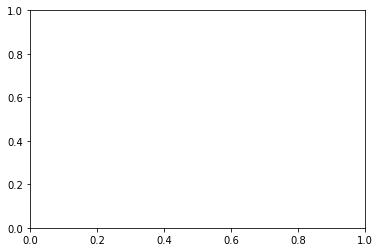

In [1]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Call the show function to show the result
plt.show()

## Adding data to an Axes object

Adding data to a figure is done by calling methods of the `Axes` object. In this exercise, we will use the `plot` method to add data about rainfall in two American cities: Seattle, WA and Austin, TX.

The data are stored in two Pandas DataFrame objects that are already loaded into memory: `seattle_weather` stores information about the weather in Seattle, and `austin_weather` stores information about the weather in Austin. Each of the data frames has a `"MONTHS"` column that stores the three-letter name of the months. Each also has a column named `"MLY-PRCP-NORMAL"` that stores the average rainfall in each month during a ten-year period.

In this exercise, you will create a visualization that will allow you to compare the rainfall in these two cities.

In [2]:
import pandas as pd
import calendar # Used for calendar.month_abbr inside lambda function
austin_weather = pd.read_csv('datasets/austin_weather.csv')
# DF miss MONTH column, wee ned to generate it.
austin_weather['MONTH'] = austin_weather['DATE'].apply(lambda x: calendar.month_abbr[x])
austin_weather = austin_weather.set_index('DATE')
austin_weather = austin_weather[austin_weather['NAME'] == 'AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US']


seattle_weather = pd.read_csv('datasets/seattle_weather.csv')
seattle_weather['MONTH'] = seattle_weather['DATE'].apply(lambda x: calendar.month_abbr[x])
seattle_weather = seattle_weather.set_index('DATE')
seattle_weather = seattle_weather[seattle_weather['NAME'] == 'SEATTLE SAND PT WSFO, WA US']

### Instructions

- Import the `matplotlib.pyplot` submodule as `plt`.
- Create a Figure and an Axes object by calling `plt.subplots`.
- Add data from the `seattle_weather` DataFrame by calling the Axes `plot` method.
- Add data from the `austin_weather` DataFrame in a similar manner and call `plt.show` to show the results.

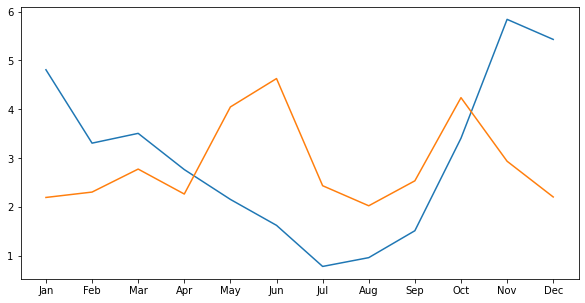

In [3]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots(figsize=(10,5))

# Plot MLY-PRCP-NORMAL from seattle_weather against the MONTH
ax.plot(seattle_weather["MONTH"], seattle_weather['MLY-PRCP-NORMAL'])

# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
ax.plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'])

# Call the show function
plt.show()

## Customizing data appearance

We can customize the appearance of data in our plots, while adding the data to the plot, using key-word arguments to the plot command.

In this exercise, you will customize the appearance of the markers, the linestyle that is used, and the color of the lines and markers for your data.

As before, the data is already provided in Pandas DataFrame objects loaded into memory: `seattle_weather` and austin_weather. These each have a `"MONTHS"` column and a `"MLY-PRCP-NORMAL"` that you will plot against each other.

In addition, a Figure object named `fig` and an `Axes` object named `ax` have already been created for you.

### Instructions
- Call `plt.plot` to plot `"MLY-PRCP-NORMAL"` against `"MONTHS"` in both DataFrames.
- Pass the `color` key-word arguments to these commands to set the color of the Seattle data to blue ('b') and the Austin data to red ('r').
- Pass the `marker` key-word arguments to these commands to set the Seattle data to circle markers ('o') and the Austin markers to triangles pointing downwards ('v').
- Pass the `linestyle` key-word argument to use dashed lines for the data from both cities ('--').

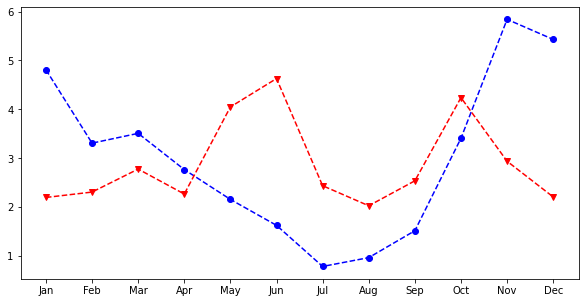

In [4]:
fig, ax = plt.subplots(figsize=(10,5))

# Plot Seattle data, setting data appearance
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color = 'b', marker = 'o', linestyle = '--')

# Plot Austin data, setting data appearance
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color = 'r', marker = 'v', linestyle = '--')

# Call show to display the resulting plot
plt.show()

## Customizing axis labels and adding titles

Customizing the axis labels requires using the `set_xlabel` and `set_ylabel` methods of the Axes object. Adding a title uses the `set_title` method.

In this exercise, you will customize the content of the axis labels and add a title to a plot.

As before, the data is already provided in Pandas DataFrame objects loaded into memory: `seattle_weather` and `austin_weather`. These each have a `"MONTH"` column and a `"MLY-PRCP-NORMAL"` column. These data are plotted against each other in the first two lines of the sample code provided.

In addition, a Figure object named fig and an Axes object named ax have already been created for you.

### Instructions
- Use the `set_xlabel` method to add the label: `"Time (months)"`.
- Use the `set_ylabel` method to add the label: `"Precipitation (inches)"`.
- Use the `set_title` method to add the title: `"Weather patterns in Austin and Seattle"`.

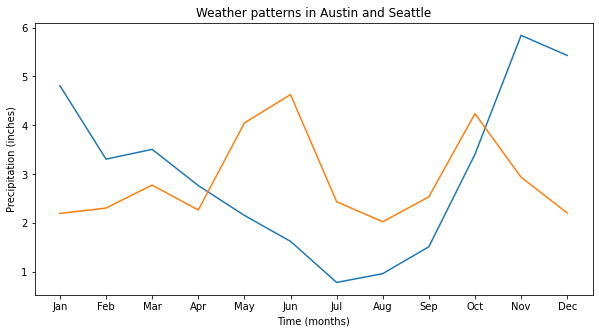

In [5]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"])
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"])

# Customize the x-axis label
ax.set_xlabel('Time (months)')

# Customize the y-axis label
ax.set_ylabel('Precipitation (inches)')

# Add the title
ax.set_title('Weather patterns in Austin and Seattle')

# Display the figure
plt.show()

## Creating small multiples with plt.subplots

Small multiples are used to plot several datasets side-by-side. In Matplotlib, small multiples can be created using the `plt.subplots()` function. The first argument is the number of rows in the array of Axes objects generate and the second argument is the number of columns. In this exercise, you will use the Austin and Seattle data to practice creating and populating an array of subplots.

The data is given to you in DataFrames: `seattle_weather` and `austin_weather`. These each have a `"MONTH"` column and `"MLY-PRCP-NORMAL"` (for average precipitation), as well a `"MLY-TAVG-NORMAL"` (for average temperature) columns. In this exercise, you will plot in a separate subplot the monthly average precipitation and average temperatures in each city.

### Instructions
- Create a Figure and an array of subplots with 2 rows and 2 columns.
- Addressing the top left Axes as index 0, 0, plot the Seattle precipitation.
- In the top right (index 0,1), plot Seattle temperatures.
- In the bottom left (1, 0) and bottom right (1, 1) plot Austin precipitations and temperatures.

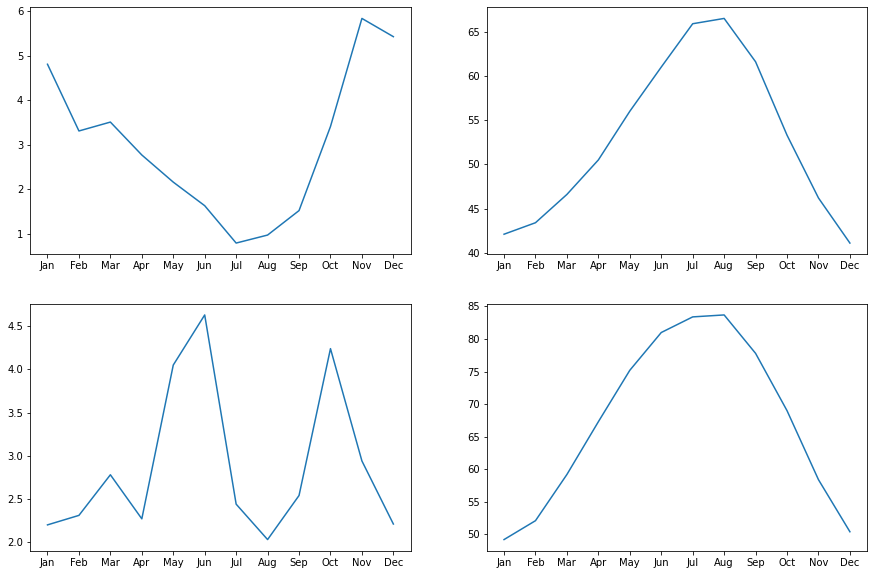

In [6]:
# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2,figsize=(15,10))

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'])

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1, 0].plot(austin_weather['MONTH'] , austin_weather['MLY-PRCP-NORMAL'])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1, 1].plot(austin_weather['MONTH'], austin_weather['MLY-TAVG-NORMAL'])
plt.show()

## Small multiples with shared y axis

When creating small multiples, it is often preferable to make sure that the different plots are displayed with the same scale used on the y-axis. This can be configured by setting the `sharey` key-word to `True`.

In this exercise, you will create a Figure with two Axes objects that share their y-axis. As before, the data is provided in `seattle_weather` and `austin_weather` DataFrames.

### Instructions
- Create a Figure with an array of two Axes objects that share their y-axis range.
- Plot Seattle's `"MLY-PRCP-NORMAL"` in a solid blue line in the top Axes.
- Add Seattle's `"MLY-PRCP-25PCTL"` and `"MLY-PRCP-75PCTL"` in dashed blue lines to the top Axes.
- Plot Austin's `"MLY-PRCP-NORMAL"` in a solid red line in the top Axes and the `"MLY-PRCP-25PCTL"` and `"MLY-PRCP-75PCTL"` in dashed red lines.

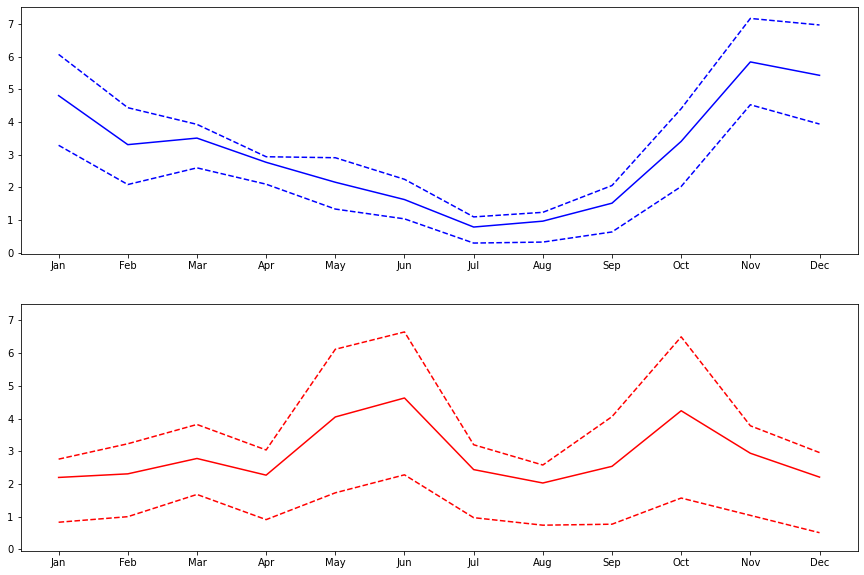

In [7]:
# Create a figure and an array of axes: 2 rows, 1 column with shared y axis
fig, ax = plt.subplots(2, 1, sharey=True, figsize=(15,10))

# Plot Seattle precipitation data in the top axes
ax[0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'], color = 'b')
ax[0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-25PCTL'], color = 'b', linestyle = '--')
ax[0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-75PCTL'], color = 'b', linestyle = '--')

# Plot Austin precipitation data in the bottom axes
ax[1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'], color = 'r')
ax[1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-25PCTL'], color = 'r', linestyle = '--')
ax[1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-75PCTL'], color = 'r', linestyle = '--')

plt.show()